In [1]:
import pandas as pd
import plotly as px
import geopandas as gp

In [2]:
data_df = pd.read_excel(r'/Users/dhruvpandit/Documents/GitHub/Projects/WiTH Africa Data Challenge/whc-sites-2021.xls')

In [3]:
data_df.drop(data_df.loc[:, data_df.columns.str.endswith('_fr')].columns, axis=1, inplace=True)
data_df = data_df[data_df['region_en'] == 'Africa']
data_df.columns

Index(['unique_number', 'id_no', 'rev_bis', 'name_en', 'short_description_en',
       'justification_en', 'date_inscribed', 'secondary_dates', 'danger',
       'date_end', 'danger_list', 'longitude', 'latitude', 'area_hectares',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'N7', 'N8', 'N9', 'N10',
       'criteria_txt', 'category', 'category_short', 'states_name_en',
       'region_en', 'iso_code', 'udnp_code', 'transboundary'],
      dtype='object')

In [8]:
data_df

,unique_number,id_no,rev_bis,name_en,short_description_en,justification_en,date_inscribed,secondary_dates,danger,date_end,...,N9,N10,criteria_txt,category,category_short,states_name_en,region_en,iso_code,udnp_code,transboundary
12,2128,1511,NaN,"Mbanza Kongo, Vestiges of the Capital of the f...","<p>The town of Mbanza Kongo, located on a plat...",NaN,2017,NaN,0,NaN,...,0,0,(iii)(iv),Cultural,C,Angola,Africa,ao,ang,0
75,1560,323,Bis,Royal Palaces of Abomey,"<p>From 1625 to 1900, 12 kings succeeded one a...",NaN,1985,NaN,0,2007.0,...,0,0,(iii)(iv),Cultural,C,Benin,Africa,bj,ben,0
84,1191,1021,NaN,Tsodilo,<p>With one of the highest concentrations of r...,<p><strong>Criterion i:</strong> For many thou...,2001,NaN,0,NaN,...,0,0,(i)(iii)(vi),Cultural,C,Botswana,Africa,bw,bwa,0
85,1976,1432,NaN,Okavango Delta,<p>This delta in north-west Botswana comprises...,NaN,2014,NaN,0,NaN,...,1,1,(vii)(ix)(x),Natural,N,Botswana,Africa,bw,bwa,0
117,1696,1225,Rev,Ruins of Loropéni,"<p>The 11,130m2 property, the first to be insc...",NaN,2009,NaN,0,NaN,...,0,0,(iii),Cultural,C,Burkina Faso,Africa,bf,bfa,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,1920,1380,Rev,Sangha Trinational,"<p>Situated in the north-western Congo Basin, ...",NaN,2012,NaN,0,NaN,...,1,1,(ix)(x),Natural,N,"Cameroon,Central African Republic,Congo",Africa,"cf,cg,cm","caf,cmr,cog",1
1132,173,155,-257,Mount Nimba Strict Nature Reserve,"<p>Located on the borders of Guinea, Liberia a...",NaN,1981,1982,1,NaN,...,1,1,(ix)(x),Natural,N,"Côte d'Ivoire,Guinea",Africa,"ci,gn","civ,gin",1
1138,1403,1226,NaN,Stone Circles of Senegambia,<p>The site consists of four large groups of s...,NaN,2006,NaN,0,NaN,...,0,0,(i)(iii),Cultural,C,"Gambia (the),Senegal",Africa,"gm,sn","gmb,sen",1
1147,1885,985,Bis,Maloti-Drakensberg Park,<p>The Maloti-Drakensberg Park is a transnatio...,NaN,2000,2013,0,NaN,...,0,1,(i)(iii)(vii)(x),Mixed,C/N,"Lesotho,South Africa",Africa,"ls,za","lso,zaf",1


In [4]:
data_df_transformed = data_df[['rev_bis', 'name_en', 'short_description_en',
       'justification_en', 'date_inscribed', 'secondary_dates', 'danger',
       'date_end', 'danger_list', 'longitude', 'latitude', 'area_hectares',
       'category', 'category_short', 'states_name_en']]

In [32]:
data_df_transformed

,rev_bis,name_en,short_description_en,justification_en,date_inscribed,secondary_dates,danger,date_end,danger_list,longitude,latitude,area_hectares,category,category_short,states_name_en,geometry
12,NaN,"Mbanza Kongo, Vestiges of the Capital of the f...","<p>The town of Mbanza Kongo, located on a plat...",NaN,2017,NaN,0,NaN,NaN,14.249722,-6.268889,89.290,Cultural,C,Angola,POINT (14.24972 -6.26889)
75,Bis,Royal Palaces of Abomey,"<p>From 1625 to 1900, 12 kings succeeded one a...",NaN,1985,NaN,0,2007.0,P 1985-2007,1.983333,7.183333,47.600,Cultural,C,Benin,POINT (1.98333 7.18333)
84,NaN,Tsodilo,<p>With one of the highest concentrations of r...,<p><strong>Criterion i:</strong> For many thou...,2001,NaN,0,NaN,NaN,21.733333,-18.750000,4800.000,Cultural,C,Botswana,POINT (21.73333 -18.75000)
85,NaN,Okavango Delta,<p>This delta in north-west Botswana comprises...,NaN,2014,NaN,0,NaN,NaN,22.900000,-19.283333,2023590.000,Natural,N,Botswana,POINT (22.90000 -19.28333)
117,Rev,Ruins of Loropéni,"<p>The 11,130m2 property, the first to be insc...",NaN,2009,NaN,0,NaN,NaN,-3.583333,10.250000,1.113,Cultural,C,Burkina Faso,POINT (-3.58333 10.25000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,Rev,Sangha Trinational,"<p>Situated in the north-western Congo Basin, ...",NaN,2012,NaN,0,NaN,NaN,16.554167,2.609444,746309.000,Natural,N,"Cameroon,Central African Republic,Congo",POINT (16.55417 2.60944)
1132,-257,Mount Nimba Strict Nature Reserve,"<p>Located on the borders of Guinea, Liberia a...",NaN,1981,1982,1,NaN,Y 1992,-8.390970,7.603180,17540.000,Natural,N,"Côte d'Ivoire,Guinea",POINT (-8.39097 7.60318)
1138,NaN,Stone Circles of Senegambia,<p>The site consists of four large groups of s...,NaN,2006,NaN,0,NaN,NaN,-15.522500,13.691111,9.850,Cultural,C,"Gambia (the),Senegal",POINT (-15.52250 13.69111)
1147,Bis,Maloti-Drakensberg Park,<p>The Maloti-Drakensberg Park is a transnatio...,NaN,2000,2013,0,NaN,NaN,29.123056,-29.765278,249313.000,Mixed,C/N,"Lesotho,South Africa",POINT (29.12306 -29.76528)


<AxesSubplot: >

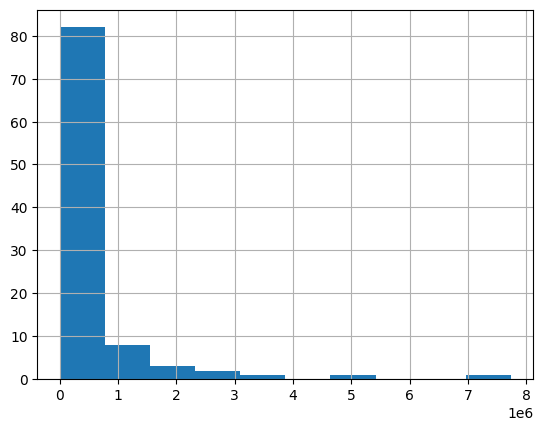

In [7]:
data_df_transformed['area_hectares'].hist()

<AxesSubplot: >

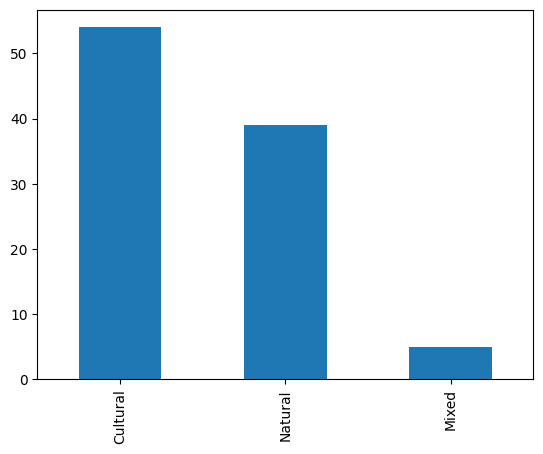

In [26]:
data_df_transformed['category'].value_counts().plot.bar()

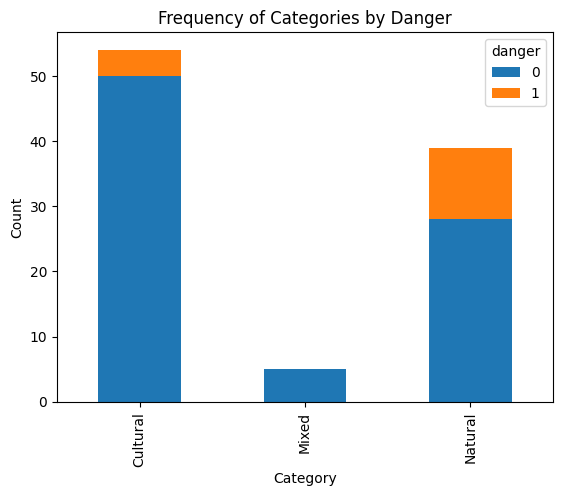

In [43]:
import matplotlib.pyplot as plt
# assuming your data is in a dataframe called df

data_df_transformed.groupby(['category', 'danger'])['states_name_en'].count().unstack().plot(kind='bar', stacked=True)

plt.title('Frequency of Categories by Danger')
plt.xlabel('Category')
plt.ylabel('Count')

plt.show()


In [8]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# create a pandas dataframe with latitude and longitude columns
df = data_df_transformed
# create a list of Point objects from the latitude and longitude columns
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]

# create a geodataframe from the dataframe and the geometry list
gdf2 = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# print the resulting geodataframe
gdf2.explore(column='category', cmap='Set1',  legend=True)

In [31]:
import plotly.express as px

# create an interactive world map using Plotly
fig = px.scatter_mapbox(gdf2, lat='latitude', lon='longitude', hover_name='name_en', size='area_hectares', size_max=30,
                        zoom=1,  color='category', color_discrete_sequence=px.colors.qualitative.Pastel,
                        hover_data={'area_hectares': True}, width=1000)

# update the mapbox style to 'open-street-map'
fig.update_layout(mapbox_style='open-street-map')
fig.update_traces(marker_sizemin=5)
# show the map
fig.show()


In [67]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


fig = make_subplots()


data = dict(
        type='choropleth',
        locations=data_df_transformed['states_name_en'], # column with the name of the countries
        z=data_df_transformed['danger'], # column you want to plot
        locationmode='country names',
        colorscale='Reds',
        colorbar_title='Danger'      )

layout = dict(title='African Countries Danger')

fig = go.Figure(data=[data], layout=layout)


fig.show()


In [44]:
# create the density heatmap chart
fig = px.density_heatmap(data_df_transformed, x="states_name_en", y="category")

# display the chart
fig.show()


In [51]:
data_df_transformed = pd.concat([data_df_transformed, pd.get_dummies(data_df_transformed['category'])], axis = 1)
data_df_transformed

,rev_bis,name_en,short_description_en,justification_en,date_inscribed,secondary_dates,danger,date_end,danger_list,longitude,latitude,area_hectares,category,category_short,states_name_en,geometry,Cultural,Mixed,Natural
12,NaN,"Mbanza Kongo, Vestiges of the Capital of the f...","<p>The town of Mbanza Kongo, located on a plat...",NaN,2017,NaN,0,NaN,NaN,14.249722,-6.268889,89.290,Cultural,C,Angola,POINT (14.24972 -6.26889),1,0,0
75,Bis,Royal Palaces of Abomey,"<p>From 1625 to 1900, 12 kings succeeded one a...",NaN,1985,NaN,0,2007.0,P 1985-2007,1.983333,7.183333,47.600,Cultural,C,Benin,POINT (1.98333 7.18333),1,0,0
84,NaN,Tsodilo,<p>With one of the highest concentrations of r...,<p><strong>Criterion i:</strong> For many thou...,2001,NaN,0,NaN,NaN,21.733333,-18.750000,4800.000,Cultural,C,Botswana,POINT (21.73333 -18.75000),1,0,0
85,NaN,Okavango Delta,<p>This delta in north-west Botswana comprises...,NaN,2014,NaN,0,NaN,NaN,22.900000,-19.283333,2023590.000,Natural,N,Botswana,POINT (22.90000 -19.28333),0,0,1
117,Rev,Ruins of Loropéni,"<p>The 11,130m2 property, the first to be insc...",NaN,2009,NaN,0,NaN,NaN,-3.583333,10.250000,1.113,Cultural,C,Burkina Faso,POINT (-3.58333 10.25000),1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,Rev,Sangha Trinational,"<p>Situated in the north-western Congo Basin, ...",NaN,2012,NaN,0,NaN,NaN,16.554167,2.609444,746309.000,Natural,N,"Cameroon,Central African Republic,Congo",POINT (16.55417 2.60944),0,0,1
1132,-257,Mount Nimba Strict Nature Reserve,"<p>Located on the borders of Guinea, Liberia a...",NaN,1981,1982,1,NaN,Y 1992,-8.390970,7.603180,17540.000,Natural,N,"Côte d'Ivoire,Guinea",POINT (-8.39097 7.60318),0,0,1
1138,NaN,Stone Circles of Senegambia,<p>The site consists of four large groups of s...,NaN,2006,NaN,0,NaN,NaN,-15.522500,13.691111,9.850,Cultural,C,"Gambia (the),Senegal",POINT (-15.52250 13.69111),1,0,0
1147,Bis,Maloti-Drakensberg Park,<p>The Maloti-Drakensberg Park is a transnatio...,NaN,2000,2013,0,NaN,NaN,29.123056,-29.765278,249313.000,Mixed,C/N,"Lesotho,South Africa",POINT (29.12306 -29.76528),0,1,0


In [58]:

# Create figure
fig = px.density_mapbox(data_df_transformed, lat='latitude', lon='longitude', z='Mixed',
                        radius=10, center=dict(lat=6, lon=24), zoom=1.5,
                        mapbox_style="open-street-map")

# Show figure
fig.show()


In [ ]:
import plotly.graph_objs as go




data = dict(
        type='choropleth',
        locations=data_df_transformed['states_name_en'], # column with the name of the countries
        z=data_df_transformed['danger'], # column you want to plot
        locationmode='country names',
        colorscale='Reds',
        colorbar_title='Danger'      )

layout = dict(title='African Countries Danger')

fig = go.Figure(data=[data], layout=layout)
fig.show()

